<a href="https://www.kaggle.com/code/marthinx/marthinx-shares?scriptVersionId=135314257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How to analyse stock data using yfinance
A first blog post 2023 by Martin Schottmann - UdaCity Data Scientist



<img src='https://dri.es/files/images/blog/shares.jpg'></img>

# Introduction
Yahoo! Finance https://finance.yahoo.com/ is an excellent, free website that provides investment and financial information, including news, stock quotes, press releases, reports and more. It is a the go-to site for all news and data on markets, investments and stocks.

The analysation of shares is very interesting and in combination with **Artificial Intelligence** and **Data Science** it can we a great way to optimise the performance of a depot.

**This is my first blogpost** ( for all othes and for myself to remember how to do do it ).


### Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt # Graphs
import plotly.express as px

# if yfinace exist import else install and import
try:
    import yfinance as yf         # import Yahoo! Finance
except:
    # ##### download lib 'yfinance'
    ! pip install yfinance
    import yfinance as yf         # import Yahoo! Finance
    
    
from datetime import date, timedelta
from datetime import time
from datetime import datetime

# Get today's date
today =  date.today()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.8 MB/s eta 0:00:00


### Definitions

In [2]:
def plot_stock_data(data,title):
    '''function for plotting stock data'''
    plot = px.line(data, 
                        x="Date", 
                        y=["Close"], 
                        hover_name="Date",
                        line_shape="linear",
                        title=title) 
    return plot




Start = date.today() - timedelta(5*365) # 5 years ago
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')


def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End)['Adj Close'])     
    return Asset


---------------------------------------

# Exploratory Data Analysis
### Prepare Data

### Download shares

In [3]:
apple = yf.download('AAPL', 
                      start='1980-12-12', 
                      end=today, 
                      progress=True,
)
apple.to_csv('Apple Stock Price.csv')

[*********************100%***********************]  1 of 1 completed


------------------------------------------------------------------------

# Accessing the Data
### Analyse file

In [4]:
apple.sample(5)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-05,163.850006,164.080002,154.949997,156.770004,155.610809,130525300
1997-03-05,0.148438,0.151786,0.147321,0.151786,0.129009,96163200
1994-05-18,0.265625,0.274554,0.261161,0.273438,0.227406,123860800
2011-11-21,13.228571,13.274286,13.068214,13.178929,11.201335,447980400
2006-06-30,2.056786,2.062500,2.017857,2.045357,1.738436,739695600


In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10726 entries, 1980-12-12 to 2023-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10726 non-null  float64
 1   High       10726 non-null  float64
 2   Low        10726 non-null  float64
 3   Close      10726 non-null  float64
 4   Adj Close  10726 non-null  float64
 5   Volume     10726 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 586.6 KB


In [6]:
apple.describe()


,Open,High,Low,Close,Adj Close,Volume
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,1.072600e+04
mean,18.116736,18.321750,17.919665,18.129481,17.419114,3.246302e+08
std,38.168688,38.620958,37.749540,38.207627,37.842067,3.370947e+08
min,0.049665,0.049665,0.049107,0.049107,0.038102,0.000000e+00
25%,0.290179,0.299107,0.283549,0.291127,0.239456,1.188336e+08
50%,0.495536,0.503392,0.488839,0.495804,0.411463,2.118760e+08
75%,17.860981,18.005178,17.734732,17.882589,15.494695,4.044488e+08
max,189.080002,190.070007,188.940002,189.589996,189.589996,7.421641e+09


In [7]:
apple.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099584   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094388   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087461   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089625   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092224   
...                ...         ...         ...         ...         ...   
2023-06-23  185.550003  187.559998  185.009995  186.679993  186.679993   
2023-06-26  186.830002  188.050003  185.229996  185.270004  185.270004   
2023-06-27  185.889999  188.389999  185.669998  188.059998  188.059998   
2023-06-28  187.929993  189.899994  187.600006  189.250000  189.250000   
2023-06-29  189.080002  190.070007  188.940002  189.589996  189.589996   

       

### First view to some shares

In [8]:
apple = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/AAPL.csv')
netflix = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/NFLX.csv')
google = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/GOOG.csv')
microsoft = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/MSFT.csv')
amazon = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/AMZN.csv')
nvidia = pd.read_csv('/kaggle/input/stock-market-dataset/stocks/NVDA.csv')

## Graphical view

In [9]:
plot_stock_data(apple[-30:],'Apple')

# Analyse and visualize data
### Here are 3 examples of shares and the analysis. 

### 1. Apple

[*********************100%***********************]  1 of 1 completed


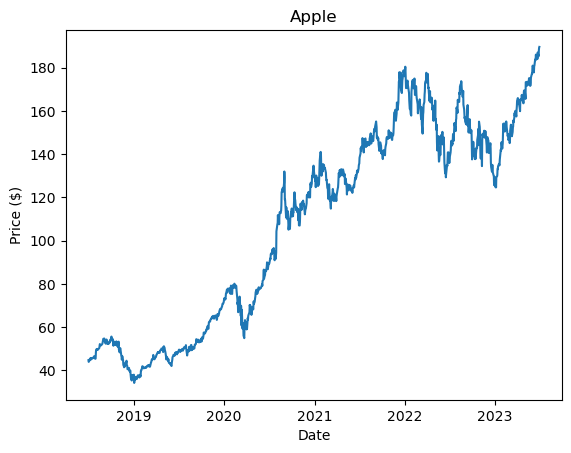

In [10]:
apple = closing_price('AAPL')

plt.plot(apple)
plt.title('Apple')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()


### 2. Amazon


[*********************100%***********************]  1 of 1 completed


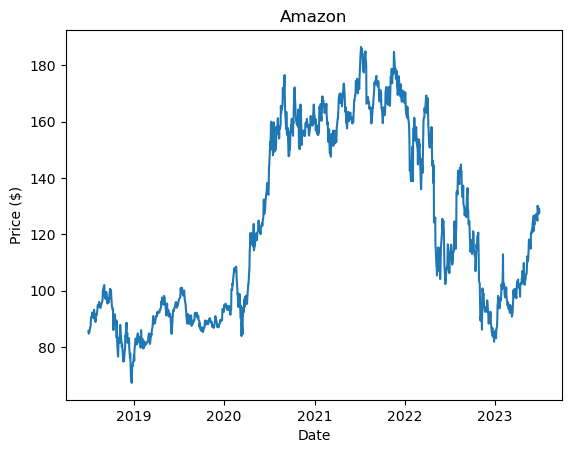

In [11]:
amazon = closing_price('AMZN')

plt.plot(amazon)
plt.title('Amazon')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()


### 3. Google


[*********************100%***********************]  1 of 1 completed


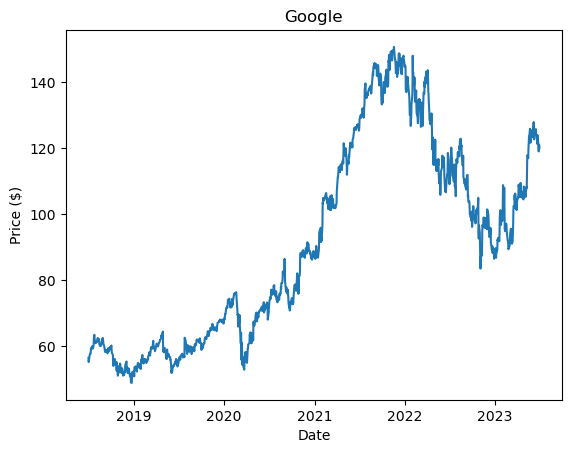

In [12]:
goog = closing_price('GOOG')

plt.plot(goog)
plt.title('Google')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

## Conclusion
### with the library 'yfinance' you can get all the stock data that are needed. It is a great way to analyse a depot and to analyse shares.

### If you enjoyed reading this article, please recommend and share it to help others find it!

--------------------------------------------------------------------------------

## About The Author
Martin Schottmann is a students of UdaCity Data Scientist. 
You can connect with him via [LinkedIn](https://www.linkedin.com/feed/).